In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [3]:
item_categories = pd.read_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/item_categories.csv')
items = pd.read_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/items.csv')
sales_train = pd.read_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/sales_train.csv')
sample = pd.read_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/sample_submission.csv')
shops = pd.read_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/shops.csv')
test = pd.read_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/test.csv')

# memory

In [4]:
item_categories['item_category_id'] = item_categories['item_category_id'].astype('uint8')

In [5]:
items['item_id'] = items['item_id'].astype('uint16')
items['item_category_id'] = items['item_category_id'].astype('uint8')

In [6]:
sales_train['date_block_num'] = sales_train['date_block_num'].astype('uint8')
sales_train['shop_id'] = sales_train['shop_id'].astype('uint8')
sales_train['item_id'] = sales_train['item_id'].astype('uint16')
sales_train['item_cnt_day'] = sales_train['item_cnt_day'].astype('int32')

In [7]:
shops['shop_id'] = shops['shop_id'].astype('uint8')

In [8]:
test['shop_id'] = test['shop_id'].astype('uint8')
test['item_id'] = test['item_id'].astype('uint16')

# splitting data TIMEWISE

# for tree-based models

In [10]:
sales_train.drop_duplicates(inplace=True)

In [9]:
sales_train['month'] = sales_train['date'].str.slice(start=3,stop=5).astype('uint8')
sales_train['year'] = sales_train['date'].str.slice(start=6).astype('uint16')
sales_train['day'] = sales_train['date'].str.slice(stop=2).astype('uint8')

In [11]:
sales_train.drop('date', axis=1, inplace=True)

In [39]:
iii = list(sales_train[sales_train['item_cnt_day']<0].index)

In [40]:
len(iii)

7356

In [155]:
sales_train.drop(index=iii, inplace=True)

In [ ]:
sales_train.shape

In [12]:
shops.loc[shops['shop_id']==11, 'shop_id'] = 10
shops.loc[shops['shop_id']==0, 'shop_id'] = 57
shops.loc[shops['shop_id']==1, 'shop_id'] = 58
shops.loc[shops['shop_id']==23, 'shop_id'] = 24

In [13]:
shops.drop(index=[0, 1, 10, 23], inplace=True)

In [14]:
sales_train.loc[sales_train['shop_id']==11, 'shop_id'] = 10
sales_train.loc[sales_train['shop_id']==0, 'shop_id'] = 57
sales_train.loc[sales_train['shop_id']==1, 'shop_id'] = 58
sales_train.loc[sales_train['shop_id']==23, 'shop_id'] = 24

In [15]:
test.loc[test['shop_id']==11, 'shop_id'] = 10
test.loc[test['shop_id']==0, 'shop_id'] = 57
test.loc[test['shop_id']==1, 'shop_id'] = 58
test.loc[test['shop_id']==23, 'shop_id'] = 24

In [16]:
shops['city'] = ''
for i, el in enumerate(list(shops['shop_name'].str.split(' '))):
    shops['city'].iloc[i] = el[0]

C:\Users\Dindar\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
city = dict(zip(list(shops['shop_id']), list(shops['city'])))

In [18]:
sales_train['city'] = sales_train['shop_id'].map(city)
test['city'] = test['shop_id'].map(city)

In [19]:
item_categories['type'] = ''
for i, el in enumerate(list(item_categories['item_category_name'].str.split(' '))):
    item_categories['type'].iloc[i] = el[0]

In [20]:
d = dict(zip(list(item_categories['item_category_id']), list(item_categories['type'])))

In [21]:
items['type'] = items['item_category_id'].map(d)

In [ ]:
plt.figure(figsize=(18, 6))
sns.countplot(items['type'],order=items['type'].value_counts().index)

In [ ]:
items['type'].value_counts()

In [22]:
cat = dict(zip(list(items['item_id']),list(items['item_category_id'])))

In [23]:
sales_train['item_category_id'] = sales_train['item_id'].map(cat)
sales_train['type'] = sales_train['item_category_id'].map(d)

In [24]:
test['item_category_id'] = test['item_id'].map(cat)
test['type'] = test['item_category_id'].map(d)

In [ ]:
sales_train[sales_train['item_price']>100000]

In [ ]:
plt.figure(figsize=(18,4))
sns.boxplot(x=sales_train['item_cnt_day']);

In [ ]:
plt.figure(figsize=(18,4))
sns.boxplot(x=sales_train['item_price']);

In [24]:
sales_train = sales_train[sales_train['item_price']<100000]
sales_train = sales_train[sales_train['item_cnt_day']<1001]

In [26]:
sales_train.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,day,city,item_category_id,type
0,0,59,22154,999.00,1,1,2013,2,Ярославль,37,Кино
1,0,25,2552,899.00,1,1,2013,3,Москва,58,Музыка
2,0,25,2552,899.00,-1,1,2013,5,Москва,58,Музыка
3,0,25,2554,1709.05,1,1,2013,6,Москва,58,Музыка
4,0,25,2555,1099.00,1,1,2013,15,Москва,56,Музыка


In [35]:
sales_train[sales_train['item_cnt_day']<0]['item_id'].value_counts()

2331     56
3734     41
1915     32
5672     31
4332     27
         ..
6484      1
7838      1
20764     1
1701      1
4102      1
Name: item_id, Length: 3511, dtype: int64

In [29]:
sales_train.shape

(2935841, 11)

In [25]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,day,city,item_category_id,type
0,02.01.2013,0,59,22154,999.00,1,1,2013,2,Ярославль,37,Кино
1,03.01.2013,0,25,2552,899.00,1,1,2013,3,Москва,58,Музыка
2,05.01.2013,0,25,2552,899.00,-1,1,2013,5,Москва,58,Музыка
3,06.01.2013,0,25,2554,1709.05,1,1,2013,6,Москва,58,Музыка
4,15.01.2013,0,25,2555,1099.00,1,1,2013,15,Москва,56,Музыка
...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1,10,2015,10,Москва,55,Музыка
2935845,09.10.2015,33,25,7460,299.00,1,10,2015,9,Москва,55,Музыка
2935846,14.10.2015,33,25,7459,349.00,1,10,2015,14,Москва,55,Музыка
2935847,22.10.2015,33,25,7440,299.00,1,10,2015,22,Москва,57,Музыка


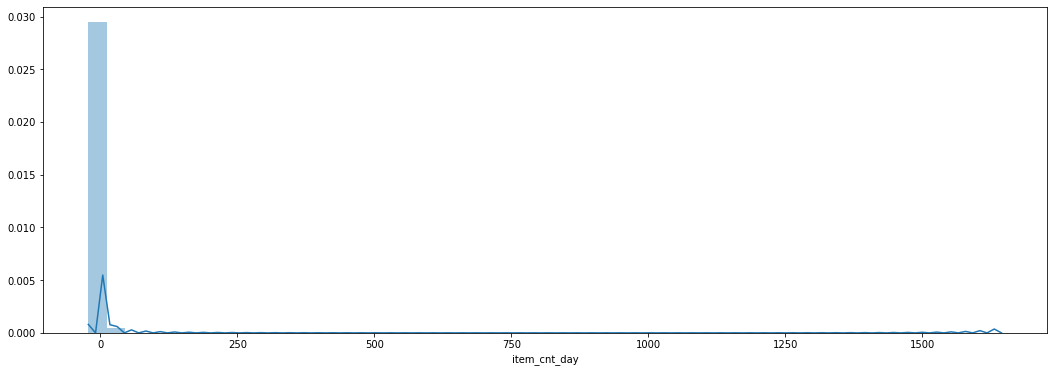

In [38]:
plt.figure(figsize=(18, 6))
sns.distplot(sales_train.groupby(['date_block_num','shop_id','item_id']).sum()['item_cnt_day'])

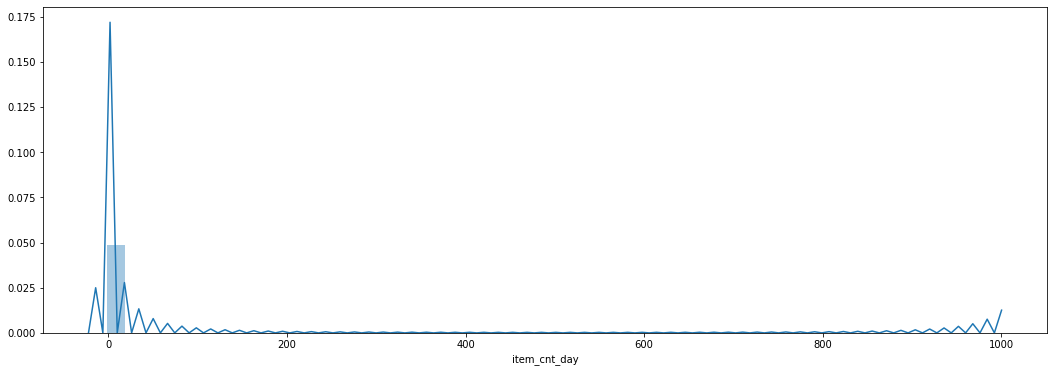

In [53]:
plt.figure(figsize=(18, 6))
sns.distplot(sales_train.groupby(['day','shop_id','item_id']).sum()['item_cnt_day'])

In [ ]:
i = sales_train.groupby(['date_block_num','shop_id','item_id']).sum()['item_cnt_day'].index
month_block = i.to_frame(index = False)
month_block['item_cnt_month'] = list(sales_train.groupby(['date_block_num','shop_id','item_id']).sum()['item_cnt_day'])

In [ ]:
i = sales_train.groupby(['day','shop_id','item_id']).sum()['item_cnt_day'].index
day_block = i.to_frame(index = False)
day_block['item_cnt_month'] = list(sales_train.groupby(['day','shop_id','item_id']).sum()['item_cnt_day'])

In [37]:
sales_train.groupby(['date_block_num','shop_id','item_id']).sum()['item_cnt_day'].mean()

2.2693145527991034

In [38]:
sales_train.groupby(['day','shop_id','item_id']).sum()['item_cnt_day'].mean()

1.7206640040599408

In [30]:
sales_train.groupby(['day','shop_id','item_id']).sum()['item_cnt_day'].min()

-22

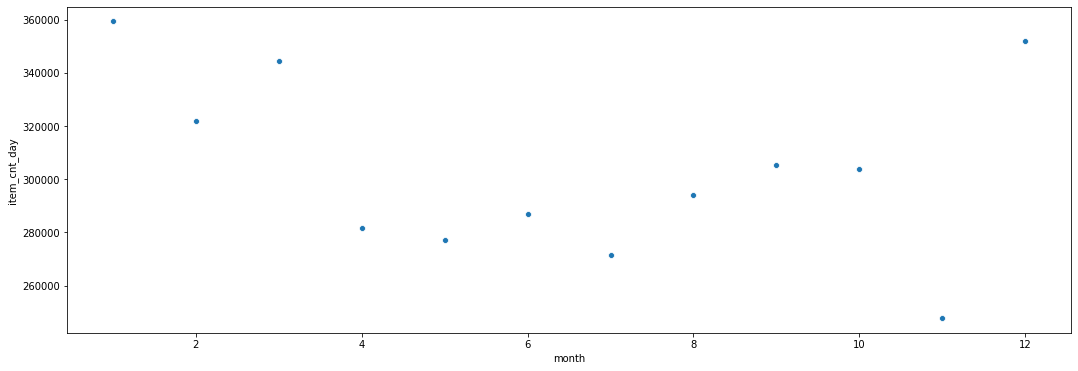

In [36]:
plt.figure(figsize=(18, 6))
sns.scatterplot(sales_train.groupby('month').sum()['item_cnt_day'].index, sales_train.groupby('month').sum()['item_cnt_day'])

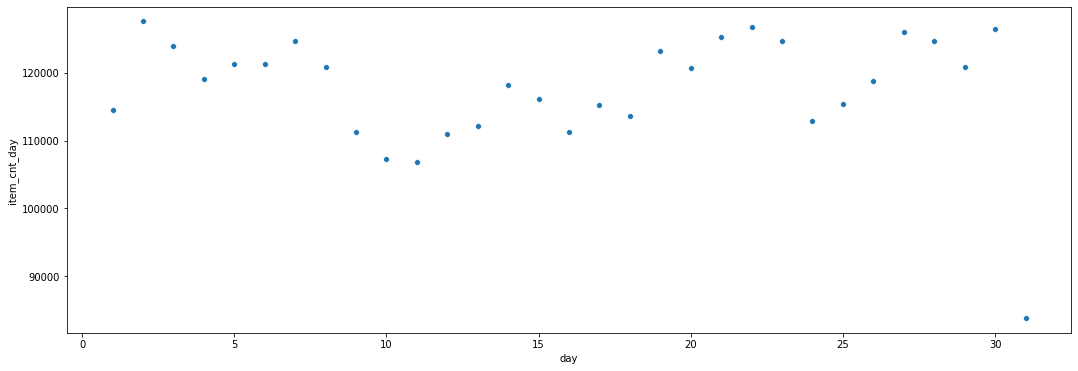

In [51]:
plt.figure(figsize=(18, 6))
sns.scatterplot(sales_train.groupby('day').sum()['item_cnt_day'].index, sales_train.groupby('day').sum()['item_cnt_day'])

In [26]:
sales_train.groupby('day').sum()['item_cnt_day']

day
1     114559
2     127587
3     123944
4     119028
5     121331
6     121241
7     124773
8     120934
9     111262
10    107277
11    106910
12    111020
13    112091
14    118212
15    116134
16    111202
17    115225
18    113608
19    123257
20    120719
21    125358
22    126714
23    124724
24    112871
25    115450
26    118728
27    126086
28    124656
29    120842
30    126466
31     83821
Name: item_cnt_day, dtype: int32

In [ ]:
median = sales_train[(sales_train.shop_id==32)&(sales_train.item_id==2973)&(sales_train.date_block_num==4)&(sales_train.item_price>0)].item_price.median()
sales_train.loc[sales_train.item_price<0, 'item_price'] = median

In [43]:
i = sales_train.groupby(['date_block_num','shop_id','item_id']).sum()['item_cnt_day'].index

In [44]:
df = i.to_frame(index = False)

In [45]:
df['item_cnt_month'] = list(sales_train.groupby(['date_block_num','shop_id','item_id']).sum()['item_cnt_day'])

In [46]:
df = df[['shop_id','item_id','date_block_num','item_cnt_month']]

In [47]:
df.sort_values(['date_block_num','shop_id','item_id'],inplace=True)

In [48]:
df

,shop_id,item_id,date_block_num,item_cnt_month
0,0,32,0,6
1,0,33,0,3
2,0,35,0,1
3,0,43,0,1
4,0,51,0,2
...,...,...,...,...
1609119,59,22087,33,6
1609120,59,22088,33,2
1609121,59,22091,33,1
1609122,59,22100,33,1


In [ ]:
sales_train.head()

In [ ]:
sales_train.groupby(['month','date_block_num','item_id','shop_id','item_category_id', 'type','city']).sum()

In [170]:
i = sales_train.groupby(['month','date_block_num','item_id','shop_id','item_category_id', 'type','city']).sum()['item_cnt_day'].index

In [171]:
df = i.to_frame(index = False)

In [172]:
df['item_cnt_month'] = list(sales_train.groupby(['month','date_block_num','item_id','shop_id','item_category_id', 'type','city']).sum()['item_cnt_day'])

In [33]:
df.shape

(1607621, 8)

In [ ]:
df['type'], _ = pd.factorize(df['type'], sort=True)

In [112]:
test_data.head()

,city,date_block_num,item_category_id,item_id,month,mov_avr_2,prev_month_cnt,shop_id
0,Адыгея,34,19,5037,11,NaN,NaN,2
1,Адыгея,34,55,5320,11,NaN,NaN,2
2,Адыгея,34,19,5233,11,NaN,2.0,2
3,Адыгея,34,23,5232,11,NaN,2.0,2
4,Адыгея,34,20,5268,11,NaN,NaN,2


In [114]:
type_dict

{'Кино': 0,
 'Игры': 1,
 'Музыка': 2,
 'Подарки': 3,
 'Книги': 4,
 'Аксессуары': 5,
 'Программы': 6,
 'Игровые': 7,
 'Карты': 8,
 'Элементы': 9,
 'Служебные': 10,
 'Чистые': 11,
 'Билеты': 12,
 'Доставка': 13,
 'PC': 14}

In [173]:
type_dict = dict(zip(list(df['type'].value_counts().index), list(range(15))))

In [110]:
dataframe['type'] = dataframe['type'].map(type_dict)
test_data['type'] = test_data['type'].map(type_dict)

KeyError: 'type'

In [174]:
df['type'] = df['type'].map(type_dict)
test['type'] = test['type'].map(type_dict)

In [175]:
city_dict = dict(zip(list(df['city'].value_counts().index), list(range(32))))

In [114]:
dataframe['city'] = dataframe['city'].map(city_dict)
test_data['city'] = test_data['city'].map(city_dict)

In [176]:
df['city'] = df['city'].map(city_dict)
test['city'] = test['city'].map(city_dict)

In [177]:
data2 = pd.pivot_table(sales_train, values='item_cnt_day', index=['date_block_num'],
                    columns=['shop_id','item_id'], aggfunc=np.sum)

In [178]:
data2

shop_id           2                                                         \
item_id        27    30    31    32    33    53    59    66    67    70      
date_block_num                                                               
0                1.0   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   
1                NaN   NaN   4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2                NaN   1.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3                NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5                NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
7                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
9                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10               NaN   NaN   NaN   NaN   2.0   NaN   NaN   NaN   NaN   NaN   
11               NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   
12               NaN   NaN   NaN   1.0   1.0   NaN   NaN   NaN   NaN   NaN   
13               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
14               NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   
15               NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
16               NaN   1.0   1.0   NaN   NaN   NaN   NaN   1.0   NaN   NaN   
17               1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
18               NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   
19               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
20               NaN   NaN   NaN   2.0   1.0   NaN   NaN   NaN   NaN   NaN   
21               NaN   NaN   NaN   2.0   NaN   NaN   NaN   NaN   NaN   NaN   
22               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
23               NaN   NaN   NaN   2.0   NaN   NaN   NaN   NaN   NaN   NaN   
24               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   
25               NaN   NaN   NaN   NaN   1.0   1.0   1.0   NaN   1.0   NaN   
26               NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   
27               NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   1.0   
28               NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   
29               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
30               NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   
31               NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   1.0   
32               NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   
33               NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

shop_id                                                                     \
item_id        76    77    97    99    257   258   317   438   464   471     
date_block_num                                                               
0                NaN   NaN   NaN   NaN   NaN   NaN   1.0   1.0   NaN   2.0   
1                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   
4                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   
7                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
9                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0   NaN   
10               NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
11               NaN 

In [179]:
new = []
for i in range(data2.shape[1]):
    new.append(np.nan)

In [180]:
dataframe = pd.DataFrame([new],columns = list(data2.columns))

In [181]:
data2 = pd.concat([data2,dataframe],ignore_index=True)

In [182]:
test['month'] = 11
test['date_block_num'] = 34

# ewna

In [ ]:
df.ewm(com=0.5).mean()

In [183]:
%%time
for i in data2.columns:
    data2[i] = data2[i].ewm(com=0.5).mean()

Wall time: 4min 11s


In [184]:
%%time
dataframe = pd.DataFrame(columns = list(df.columns))
for iii in list(data2.index):
    i = data2.iloc[iii].index.to_frame(index = False)
    i['cnt'] = list(data2.iloc[iii])
    if iii == 34:
        test_data = pd.DataFrame(columns = list(test.columns))
        for j in list(i['shop_id'].unique()):
            temp = test[(test['shop_id']==j) & (test['date_block_num']==iii)]
            eee = dict(zip(i[i['shop_id'] == j]['item_id'], i[i['shop_id'] == j]['cnt']))
            temp['ewm'] = test[(test['shop_id']==j) & (test['date_block_num']==iii)]['item_id'].map(eee)
            test_data = pd.concat([test_data,temp])
    for j in list(i['shop_id'].unique()):
        temp = df[(df['shop_id']==j) & (df['date_block_num']==iii)]
        eee = dict(zip(i[i['shop_id'] == j]['item_id'], i[i['shop_id'] == j]['cnt']))
        temp['ewm'] = df[(df['shop_id']==j) & (df['date_block_num']==iii)]['item_id'].map(eee)
        dataframe = pd.concat([dataframe,temp])

C:\Users\Dindar\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Dindar\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()
C:\Users\Dindar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

Wall time: 16min 26s


In [185]:
dataframe.to_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/tables/ewm_train.csv', index = False)
test_data.to_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/tables/ewm_test.csv', index = False)

# moving average

In [71]:
# some other similar statistics
df['cum_sum'] = df['value'].cumsum()
df['count'] = range(1,len(df['value'])+1)
df['mov_avg'] = df['cum_sum'] / df['count']

# other statistics
df['rolling_mean2'] = df['value'].rolling(window=2).mean()

In [77]:
data2.shape

(35, 416854)

In [78]:
%%time
for i in data2.columns:
    data2[i] = data2[i].rolling(window=2).mean()

In [79]:
data2.shape

(35, 416854)

In [80]:
data2

shop_id    2                                                               \
item_id 27    30    31    32    33    53    59    66    67    70    76      
0         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2         NaN   NaN   2.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3         NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
7         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
9         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
11        NaN   NaN   NaN   NaN   1.5   NaN   NaN   NaN   NaN   NaN   NaN   
12        NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   
13        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
14        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
15        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
16        NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
17        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
18        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
19        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
20        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
21        NaN   NaN   NaN   2.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
22        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
23        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
24        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
25        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   
26        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
27        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
28        NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   
29        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
30        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
31        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
32        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
33        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
34        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

shop_id                                                                    \
item_id 77    97    99    257   258   317   438   464   471   472   481     
0         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0   NaN   
7         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0   NaN   
8         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   
9         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
11        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
12        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   Na

In [84]:
%%time
dataframe = pd.DataFrame(columns = list(df.columns))
for iii in list(data2.index):
    i = data2.iloc[iii].index.to_frame(index = False)
    i['cnt'] = list(data2.iloc[iii])
    if iii == 34:
        test_data = pd.DataFrame(columns = list(test.columns))
        for j in list(i['shop_id'].unique()):
            temp = test[(test['shop_id']==j) & (test['date_block_num']==iii)]
            eee = dict(zip(i[i['shop_id'] == j]['item_id'], i[i['shop_id'] == j]['cnt']))
            temp['mov_avr_2'] = test[(test['shop_id']==j) & (test['date_block_num']==iii)]['item_id'].map(eee)
            test_data = pd.concat([test_data,temp])
    for j in list(i['shop_id'].unique()):
        temp = df[(df['shop_id']==j) & (df['date_block_num']==iii)]
        eee = dict(zip(i[i['shop_id'] == j]['item_id'], i[i['shop_id'] == j]['cnt']))
        temp['mov_avr_2'] = df[(df['shop_id']==j) & (df['date_block_num']==iii)]['item_id'].map(eee)
        dataframe = pd.concat([dataframe,temp])

C:\Users\Dindar\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Dindar\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()
C:\Users\Dindar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

Wall time: 15min 33s


In [89]:
df

,city,date_block_num,item_category_id,item_cnt_month,item_id,month,mov_avr_2,shop_id,type
0,Адыгея,0,19,1,27,1,NaN,2,Игры
1,Адыгея,0,37,1,33,1,NaN,2,Кино
2,Адыгея,0,45,1,317,1,NaN,2,Книги
3,Адыгея,0,45,1,438,1,NaN,2,Книги
4,Адыгея,0,49,2,471,1,NaN,2,Книги
...,...,...,...,...,...,...,...,...,...
1606719,Ярославль,33,83,6,22087,10,4.5,59,Элементы
1606720,Ярославль,33,83,2,22088,10,1.5,59,Элементы
1606721,Ярославль,33,83,1,22091,10,2.0,59,Элементы
1606722,Ярославль,33,42,1,22100,10,1.0,59,Книги


In [132]:
dataframe.to_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/tables/mov_av_2_train.csv', index = False)
test_data.to_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/tables/mov_av_2_test.csv', index = False)

KeyboardInterrupt: 

In [192]:
df = pd.read_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/tables/mov_av_2_train.csv')
test = pd.read_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/tables/mov_av_2_test.csv')

# prev month

In [95]:
data2 = data2.shift(periods=1, axis=0)

In [96]:
%%time
dataframe = pd.DataFrame(columns = list(df.columns))
for iii in list(data2.index):
    i = data2.iloc[iii].index.to_frame(index = False)
    i['cnt'] = list(data2.iloc[iii])
    if iii == 34:
        test_data = pd.DataFrame(columns = list(test.columns))
        for j in list(i['shop_id'].unique()):
            temp = test[(test['shop_id']==j) & (test['date_block_num']==iii)]
            eee = dict(zip(i[i['shop_id'] == j]['item_id'], i[i['shop_id'] == j]['cnt']))
            temp['prev_month_cnt'] = test[(test['shop_id']==j) & (test['date_block_num']==iii)]['item_id'].map(eee)
            test_data = pd.concat([test_data,temp])
    for j in list(i['shop_id'].unique()):
        temp = df[(df['shop_id']==j) & (df['date_block_num']==iii)]
        eee = dict(zip(i[i['shop_id'] == j]['item_id'], i[i['shop_id'] == j]['cnt']))
        temp['prev_month_cnt'] = df[(df['shop_id']==j) & (df['date_block_num']==iii)]['item_id'].map(eee)
        dataframe = pd.concat([dataframe,temp])

C:\Users\Dindar\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Dindar\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()
C:\Users\Dindar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

Wall time: 13min 48s


In [97]:
dataframe.to_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/tables/prev_month_train.csv', index = False)
test_data.to_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/tables/prev_month_test.csv', index = False)

In [116]:
dataframe1.head()

,city,date_block_num,item_category_id,item_id,month,mov_avr_2,prev_month_cnt,shop_id,item_cnt_month
0,25,0,19,27,1,NaN,NaN,2,1
1,25,0,37,33,1,NaN,NaN,2,1
2,25,0,45,317,1,NaN,NaN,2,1
3,25,0,45,438,1,NaN,NaN,2,1
4,25,0,49,471,1,NaN,NaN,2,2


In [190]:
test_data.head()

,city,date_block_num,ewm,item_category_id,item_id,month,shop_id
20400,25,34,1.077025,19,5037,11,2
20401,25,34,NaN,55,5320,11,2
20402,25,34,2.626374,19,5233,11,2
20403,25,34,2.076923,23,5232,11,2
20404,25,34,NaN,20,5268,11,2


In [ ]:
dataframe = dataframe.sort_values(['date_block_num','shop_id','item_id'])
dataframe.isnull().sum()

In [200]:
dataframe1 = df[['city','date_block_num','item_category_id','item_id','month','mov_avr_2','prev_month_cnt','shop_id','ewm','item_cnt_month']]

In [195]:
df['ewm'] = dataframe['ewm']

In [198]:
test['ewm'] = test_data['ewm']

In [199]:
test

,city,date_block_num,item_category_id,item_id,month,mov_avr_2,prev_month_cnt,shop_id,ewm
0,25,34,19,5037,11,NaN,NaN,2,1.446351
1,25,34,55,5320,11,NaN,NaN,2,NaN
2,25,34,19,5233,11,NaN,2.0,2,1.470423
3,25,34,23,5232,11,NaN,2.0,2,1.000000
4,25,34,20,5268,11,NaN,NaN,2,NaN
...,...,...,...,...,...,...,...,...,...
124785,18,34,40,11409,11,NaN,3.0,38,1.000000
124786,18,34,37,8078,11,NaN,1.0,38,1.000000
124787,18,34,55,8063,11,NaN,NaN,38,1.000000
124788,18,34,55,11261,11,NaN,NaN,38,1.000000


In [188]:
test_data.drop('ID', axis=1, inplace=True)

In [189]:
test_data.drop('type', axis=1, inplace=True)

In [ ]:
test.head()

In [ ]:
test.drop('type', axis=1, inplace=True)

In [ ]:
test['month'] = 11
test['date_block_num'] = 34

In [ ]:
test.drop('ID', axis=1, inplace=True)

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(test['type'], order=test['type'].value_counts().index)

In [207]:
x = dataframe1.drop(['item_cnt_month','prev_month_cnt'], axis=1)
y = dataframe1['item_cnt_month'].clip(0, 20)

C:\Users\Dindar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


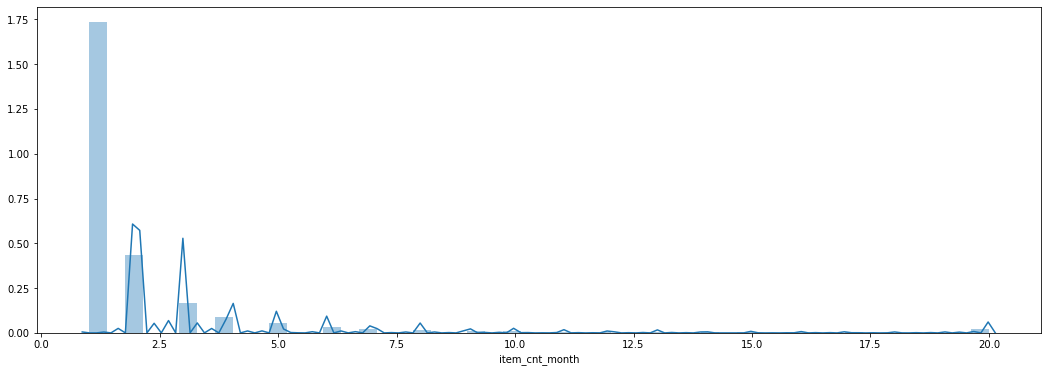

In [119]:
plt.figure(figsize=(18, 6))
sns.distplot(y)

In [ ]:
train_t = df[(df['date_block_num']!=33)&(df['date_block_num']!=32)&(df['date_block_num']!=31)&(df['date_block_num']!=30)&(df['date_block_num']!=29)]
test_t = df[(df['date_block_num']==33)|(df['date_block_num']==32)|(df['date_block_num']==31)|(df['date_block_num']==30)|(df['date_block_num']==29)]

In [ ]:
train_t.shape, test_t.shape

In [ ]:
X_train = train_t.drop('item_cnt_month', axis=1).values
X_test = test_t.drop('item_cnt_month', axis=1).values
y_train = train_t['item_cnt_month'].values
y_test = test_t['item_cnt_month'].values

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# xgb

In [202]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [208]:
%%time
xgb = XGBRegressor()
xgb.fit(x.values, y.values)

[19:01:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 1min 45s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [209]:
y_preds = xgb.predict(test.drop('prev_month_cnt', axis=1).values).clip(0, 20)

In [ ]:
y_preds = xgb.predict(test_data.values)

In [ ]:
plt.figure(figsize=(18, 6))
sns.distplot(y_preds);

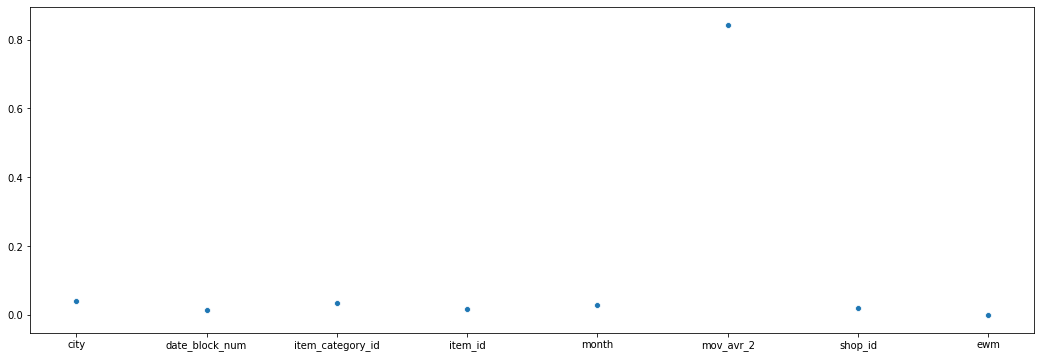

In [210]:
plt.figure(figsize=(18,6))
sns.scatterplot(list(dataframe1.drop(['item_cnt_month','prev_month_cnt'], axis=1).columns), xgb.feature_importances_)

In [ ]:
mean_squared_error(y_test, y_preds)

In [ ]:
mean_squared_error(y_test, y_preds)

In [ ]:
param = {'n_estimators':[100, 200, 300, 500, 700, 1000, 1500]}

In [ ]:
%%time
clf=GridSearchCV(XGBRegressor(max_depth=3),param, scoring='neg_root_mean_squared_error')
clf.fit(X_train,y_train)

In [ ]:
clf.best_params_

In [ ]:
clf.best_estimator_

In [ ]:
params = {'n_estimators':[100, 200, 300, 500, 700, 1000],
            'min_child_weight':[2,4,6], 
          'gamma':[i/10.0 for i in range(3,6)],  
          'subsample':[i/10.0 for i in range(3,8)],
          'colsample_bytree':[i/10.0 for i in range(2,9)],
          'max_depth': [6,8,9,10,11,12,14]}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%%time
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

In [ ]:
y_preds = rf.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_preds)

In [ ]:
rf.feature_importances_

In [ ]:
list(train_t.drop('item_cnt_month', axis=1).columns)

In [ ]:
sns.scatterplot(list(train_t.drop('item_cnt_month', axis=1).columns), rf.feature_importances_)

# tree-based models

In [126]:
from sklearn.tree import DecisionTreeRegressor

In [128]:
%%time
dt = DecisionTreeRegressor()
dt.fit(x.values, y.values)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
y_preds = dt.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_preds)

In [ ]:
dt.feature_importances_

In [ ]:
plt.figure(figsize=(18,6))
sns.scatterplot(list(df.drop('item_cnt_month', axis=1).columns), dt.feature_importances_)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import tree
import pydotplus

In [ ]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=df.drop('item_cnt_month', axis=1).columns)

graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("dt.png")

In [ ]:
parameters={'min_samples_split' : range(10,500,20),
            'max_depth': range(5,30,2)}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%%time
clf=GridSearchCV(DecisionTreeRegressor(),parameters, scoring='neg_root_mean_squared_error')
clf.fit(x, y)

In [ ]:
clf.best_params_

In [ ]:
clf.best_estimator_

In [ ]:
%%time
dt = DecisionTreeRegressor()
dt.fit(x, y)

In [ ]:
y_preds = dt.predict(test)

In [ ]:
d = dict(zip(sales_train.drop(['item_cnt_day','date_block_num'], axis=1).columns, dt.feature_importances_))

In [ ]:
s = dict(sorted(d.items(), key=lambda x: x[1],reverse=True))

In [ ]:
plt.figure(figsize=(10 ,6))
sns.scatterplot(list(s.keys()), list(s.values()))

In [211]:
sample['item_cnt_month'] = y_preds

ValueError: Length of values does not match length of index

In [ ]:
sample.head()

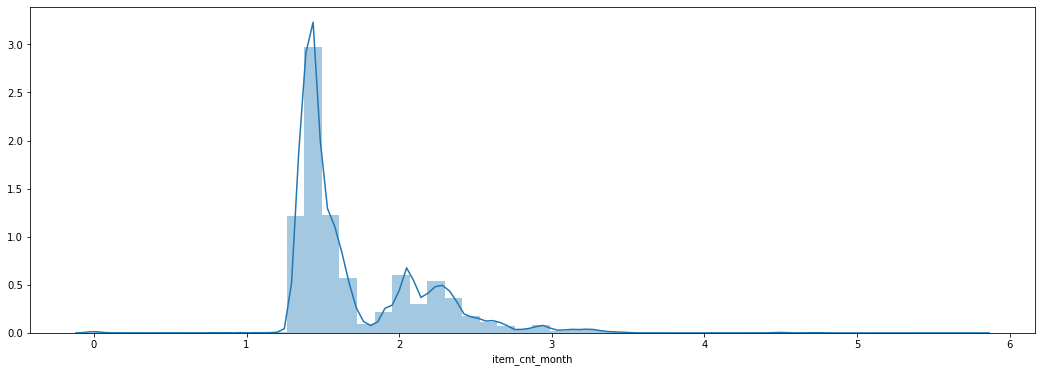

In [124]:
plt.figure(figsize=(18, 6))
sns.distplot(sample['item_cnt_month'])

In [140]:
sample.to_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/sample_submission.csv', index = False)